## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.447341  1.508863 -1.506237 -1.614302  1.312182  0.828550
1  1.384411 -1.161330 -0.325872  1.889737 -1.453236  0.159414
2  1.276065 -1.369816 -1.392657 -0.176393 -1.105408 -0.583314
3 -1.250389  0.577310 -1.419756 -0.582448  0.554899 -0.329343
4 -1.222175  1.674903  1.465768 -0.563952 -1.277051 -0.699833


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9986217	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9887884	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9786624	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9689424	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9622169	total: 71.6ms	remaining: 14.3s
5:	learn: 0.9523167	total: 72.1ms	remaining: 12s
6:	learn: 0.9415369	total: 72.6ms	remaining: 10.3s
7:	learn: 0.9337062	total: 73.1ms	remaining: 9.06s
8:	learn: 0.9258188	total: 73.6ms	remaining: 8.1s
9:	learn: 0.9174816	total: 74.2ms	remaining: 7.35s
10:	learn: 0.9094785	total: 74.7ms	remaining: 6.71s
11:	learn: 0.9000787	total: 75.4ms	remaining: 6.21s
12:	learn: 0.8917130	total: 75.9ms	remaining: 5.76s
13:	learn: 0.8824477	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8757517	total: 77ms	remaining: 5.06s
15:	learn: 0.8680864	total: 77.5ms	remaining: 4.77s
16:	learn: 0.8598558	total: 78.2ms	remaining: 4.52s
17:	learn: 0.8528678	total: 78.6ms	remaining: 4.29s
18:	learn: 0.8438367	total: 79.1ms	remaining: 4.0

86:	learn: 0.4839069	total: 110ms	remaining: 1.15s
87:	learn: 0.4811637	total: 110ms	remaining: 1.14s
88:	learn: 0.4778239	total: 111ms	remaining: 1.13s
89:	learn: 0.4741915	total: 112ms	remaining: 1.13s
90:	learn: 0.4711552	total: 112ms	remaining: 1.12s
91:	learn: 0.4671894	total: 113ms	remaining: 1.11s
92:	learn: 0.4640793	total: 113ms	remaining: 1.1s
93:	learn: 0.4606573	total: 113ms	remaining: 1.09s
94:	learn: 0.4573779	total: 114ms	remaining: 1.08s
95:	learn: 0.4540968	total: 114ms	remaining: 1.07s
96:	learn: 0.4506767	total: 115ms	remaining: 1.07s
97:	learn: 0.4481448	total: 115ms	remaining: 1.06s
98:	learn: 0.4447059	total: 115ms	remaining: 1.05s
99:	learn: 0.4413061	total: 116ms	remaining: 1.04s
100:	learn: 0.4386229	total: 116ms	remaining: 1.03s
101:	learn: 0.4353617	total: 117ms	remaining: 1.03s
102:	learn: 0.4326163	total: 117ms	remaining: 1.02s
103:	learn: 0.4298547	total: 117ms	remaining: 1.01s
104:	learn: 0.4272545	total: 118ms	remaining: 1s
105:	learn: 0.4245231	total: 1

257:	learn: 0.1602426	total: 188ms	remaining: 540ms
258:	learn: 0.1595073	total: 188ms	remaining: 539ms
259:	learn: 0.1586924	total: 189ms	remaining: 537ms
260:	learn: 0.1576322	total: 189ms	remaining: 536ms
261:	learn: 0.1564588	total: 190ms	remaining: 535ms
262:	learn: 0.1554994	total: 190ms	remaining: 533ms
263:	learn: 0.1547713	total: 191ms	remaining: 531ms
264:	learn: 0.1537685	total: 191ms	remaining: 530ms
265:	learn: 0.1530220	total: 192ms	remaining: 529ms
266:	learn: 0.1519744	total: 192ms	remaining: 527ms
267:	learn: 0.1512380	total: 193ms	remaining: 526ms
268:	learn: 0.1505529	total: 193ms	remaining: 525ms
269:	learn: 0.1495924	total: 194ms	remaining: 524ms
270:	learn: 0.1487228	total: 194ms	remaining: 522ms
271:	learn: 0.1476875	total: 195ms	remaining: 521ms
272:	learn: 0.1468066	total: 195ms	remaining: 520ms
273:	learn: 0.1459931	total: 196ms	remaining: 518ms
274:	learn: 0.1453220	total: 196ms	remaining: 517ms
275:	learn: 0.1447098	total: 197ms	remaining: 516ms
276:	learn: 

484:	learn: 0.0504411	total: 293ms	remaining: 311ms
485:	learn: 0.0501331	total: 293ms	remaining: 310ms
486:	learn: 0.0498317	total: 294ms	remaining: 310ms
487:	learn: 0.0495368	total: 294ms	remaining: 309ms
488:	learn: 0.0492745	total: 295ms	remaining: 308ms
489:	learn: 0.0490162	total: 295ms	remaining: 307ms
490:	learn: 0.0488412	total: 296ms	remaining: 307ms
491:	learn: 0.0485579	total: 296ms	remaining: 306ms
492:	learn: 0.0482931	total: 297ms	remaining: 305ms
493:	learn: 0.0480328	total: 297ms	remaining: 304ms
494:	learn: 0.0477772	total: 298ms	remaining: 304ms
495:	learn: 0.0475380	total: 298ms	remaining: 303ms
496:	learn: 0.0473032	total: 299ms	remaining: 303ms
497:	learn: 0.0470580	total: 299ms	remaining: 302ms
498:	learn: 0.0468114	total: 300ms	remaining: 301ms
499:	learn: 0.0465403	total: 300ms	remaining: 300ms
500:	learn: 0.0462753	total: 301ms	remaining: 300ms
501:	learn: 0.0460388	total: 301ms	remaining: 299ms
502:	learn: 0.0457790	total: 302ms	remaining: 298ms
503:	learn: 

644:	learn: 0.0266223	total: 371ms	remaining: 204ms
645:	learn: 0.0264540	total: 372ms	remaining: 204ms
646:	learn: 0.0262893	total: 372ms	remaining: 203ms
647:	learn: 0.0261279	total: 373ms	remaining: 203ms
648:	learn: 0.0259698	total: 373ms	remaining: 202ms
649:	learn: 0.0258736	total: 374ms	remaining: 201ms
650:	learn: 0.0257232	total: 374ms	remaining: 201ms
651:	learn: 0.0255864	total: 375ms	remaining: 200ms
652:	learn: 0.0254399	total: 375ms	remaining: 199ms
653:	learn: 0.0254210	total: 376ms	remaining: 199ms
654:	learn: 0.0254023	total: 376ms	remaining: 198ms
655:	learn: 0.0252826	total: 377ms	remaining: 197ms
656:	learn: 0.0251906	total: 377ms	remaining: 197ms
657:	learn: 0.0251005	total: 378ms	remaining: 196ms
658:	learn: 0.0249576	total: 378ms	remaining: 196ms
659:	learn: 0.0248101	total: 379ms	remaining: 195ms
660:	learn: 0.0246705	total: 379ms	remaining: 194ms
661:	learn: 0.0245746	total: 380ms	remaining: 194ms
662:	learn: 0.0244763	total: 380ms	remaining: 193ms
663:	learn: 

873:	learn: 0.0126944	total: 476ms	remaining: 68.7ms
874:	learn: 0.0126379	total: 477ms	remaining: 68.1ms
875:	learn: 0.0125581	total: 477ms	remaining: 67.6ms
876:	learn: 0.0125010	total: 478ms	remaining: 67ms
877:	learn: 0.0124937	total: 478ms	remaining: 66.5ms
878:	learn: 0.0124865	total: 479ms	remaining: 65.9ms
879:	learn: 0.0124464	total: 479ms	remaining: 65.4ms
880:	learn: 0.0123821	total: 480ms	remaining: 64.8ms
881:	learn: 0.0123267	total: 481ms	remaining: 64.3ms
882:	learn: 0.0122494	total: 481ms	remaining: 63.7ms
883:	learn: 0.0121872	total: 481ms	remaining: 63.2ms
884:	learn: 0.0121341	total: 482ms	remaining: 62.6ms
885:	learn: 0.0121269	total: 482ms	remaining: 62.1ms
886:	learn: 0.0120925	total: 483ms	remaining: 61.5ms
887:	learn: 0.0120853	total: 483ms	remaining: 61ms
888:	learn: 0.0120414	total: 484ms	remaining: 60.4ms
889:	learn: 0.0119900	total: 484ms	remaining: 59.9ms
890:	learn: 0.0119817	total: 485ms	remaining: 59.3ms
891:	learn: 0.0119391	total: 486ms	remaining: 58.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

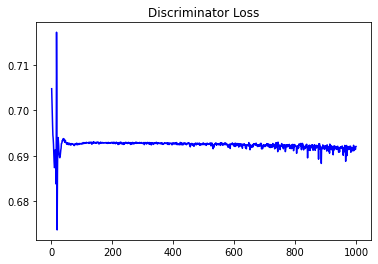

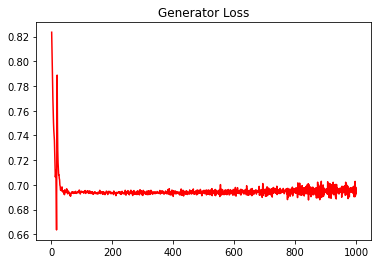

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06811206281249764


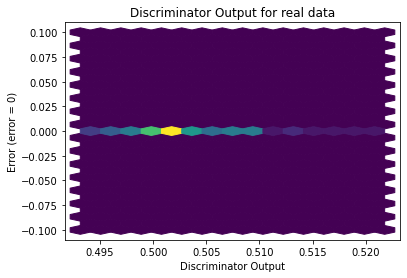

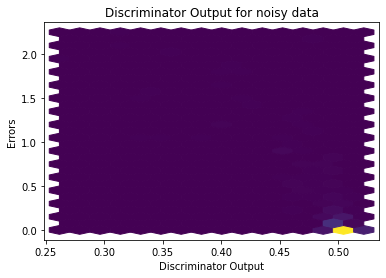

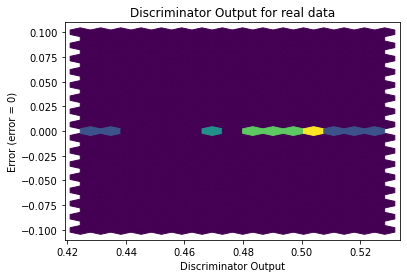

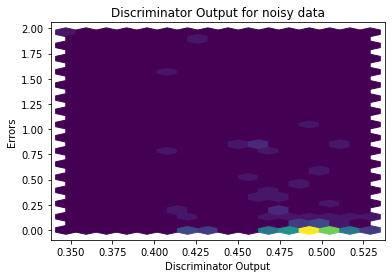

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


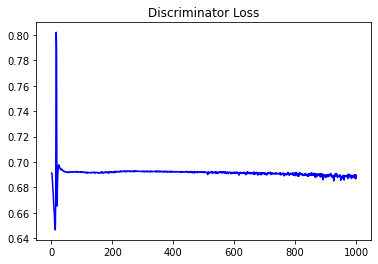

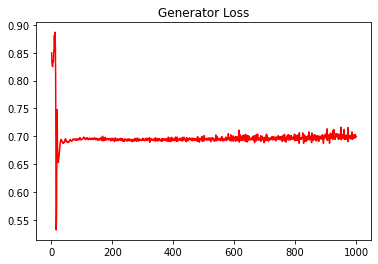

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10429437017343561


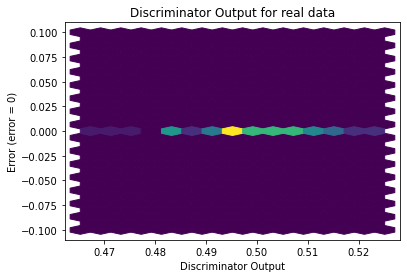

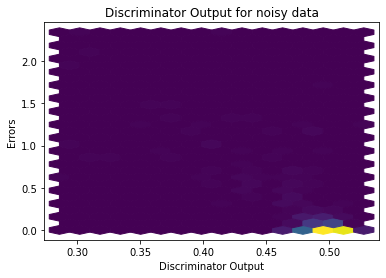

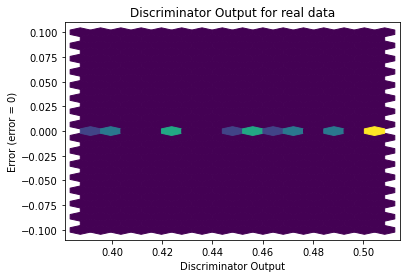

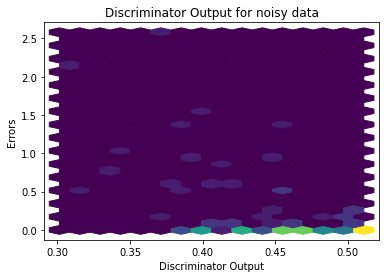

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0811]], requires_grad=True)
